In [1]:
%matplotlib inline
import datetime
import matplotlib.pyplot as plt

# Rubber Ball Data Analysis

In [2]:
with open("data/rubber_ball_data.tsv", "r", encoding="utf-8") as f:
    data = f.read()

inputs_list = []
outputs_list = []
for i, line in enumerate(data.splitlines()):
    if i == 0:
        continue
    date, vel = line.split("\t")
    inputs_list.append(date)
    outputs_list.append(int(vel))

In [3]:
def preprocess_inputs(date):
    year, month, day = date.split("-")
    date_obj = datetime.date(year=int(year), month=int(month), day=int(day))
    return date_obj

In [4]:
regularized_inputs = []

for i, inp in enumerate(inputs_list):
    if i == 0:
        start_date = preprocess_inputs(inp)
        regularized_inputs.append(0)
        continue
    reg_inp = preprocess_inputs(inp) - start_date
    regularized_inputs.append(reg_inp.days)

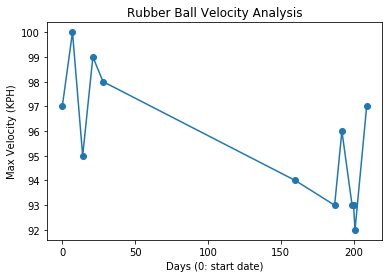

In [6]:
x = regularized_inputs
y = outputs_list

fig, ax = plt.subplots(1, 1)
#plt.plot(x, y, marker="s", color="blue", linestyle=":")
plt.plot(x, y, "o", linestyle="solid")
plt.title("Rubber Ball Velocity Analysis")
ax.set_xlabel("Days (0: start date)")
ax.set_ylabel("Max Velocity (KPH)")
plt.show()

# Regulation Ball Data Analysis

In [6]:
def preprocess_reg_inputs(years_list):
    new_inputs_list = []
    
    for i, year in enumerate(years_list):
        if i == 0:
            new_inputs_list.append(0)
            start_year = int(year)
            continue
        modified_year = int(year) - start_year
        new_inputs_list.append(modified_year)
        
    return new_inputs_list

In [7]:
with open("data/regulation_ball_data.tsv", "r", encoding="utf-8") as f:
    data = f.read()
    
tmp_reg_inputs_list = []
reg_outputs_list = []
for i, line in enumerate(data.splitlines()):
    if i == 0:
        continue
    reg_input, reg_output = line.split("\t")
    tmp_reg_inputs_list.append(reg_input)
    reg_outputs_list.append(int(reg_output))

reg_inputs_list = preprocess_reg_inputs(tmp_reg_inputs_list)

In [8]:
reg_inputs_list, reg_outputs_list

([0, 1, 2], [106, 110, 103])

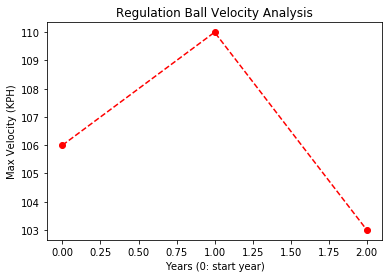

In [9]:
x_reg = reg_inputs_list
y_reg = reg_outputs_list

fig, ax = plt.subplots(1, 1)
plt.plot(x_reg, y_reg, marker="o", color="red", linestyle="--")
plt.title("Regulation Ball Velocity Analysis")
ax.set_xlabel("Years (0: start year)")
ax.set_ylabel("Max Velocity (KPH)")
plt.show()